In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [2]:
# load the data for startups
startups = (pd.read_csv('Startup Data/startup_raw.csv'))
# get rid of commas so they can be converted to integers
for column in startups.columns:
    # Check if the column contains string data type
    if startups[column].dtype == 'object':
        # Replace commas with an empty string in the column
        startups[column] = startups[column].str.replace(',', '')

startups 

,Year Ended,Surviving Establishments,Total Employment of Survivors,Survival Rates Since Birth (%),Labor Force Participation Rate (%)
0,2015.0,677876,3011469,100.0,4.4
1,2016.0,539701,3073279,79.6,5.7
2,2017.0,468293,3081916,69.1,6.6
3,2018.0,416438,3075769,61.4,7.4
4,2019.0,375833,3043285,55.4,8.1
...,...,...,...,...,...
62,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN


In [3]:
# filter to include only the years that have a 100% survival rate to show how many startups were made that year
startups_started = startups[startups['Survival Rates Since Birth (%)'] == 100]

# making the year column an integer for merge
startups_started = startups_started.rename(columns={'Year Ended' : 'year'})
startups_started = startups_started.rename(columns={'Surviving Establishments' : 'Surviving_Establishments'})
startups_started['Surviving_Establishments'] = startups_started['Surviving_Establishments'].astype(float)                                                          
startups_started

,year,Surviving_Establishments,Total Employment of Survivors,Survival Rates Since Birth (%),Labor Force Participation Rate (%)
0,2015.0,677876.0,3011469,100.0,4.4
9,2016.0,732856.0,3130736,100.0,4.3
17,2017.0,733286.0,3111021,100.0,4.2
24,2018.0,733721.0,3090584,100.0,4.2
29,2019.0,770523.0,3116850,100.0,4.0
34,2020.0,767573.0,3063425,100.0,4.0
38,2021.0,839297.0,2985309,100.0,3.6
41,2022.0,1065228.0,3697739,100.0,3.5
43,2023.0,1054052.0,3710694,100.0,3.5


In [4]:
# Filtering the startups to only have the year and number of establishments

selected_columns = ['year', 'Surviving_Establishments']
startups_numbers  = startups_started[selected_columns]
startups_numbers.to_csv('Startup Data/startup_numbers.csv', index=False)

In [5]:
# Load work from home dataset

WFH_Data = pd.read_csv('Work From Home Data/WFH 1965-present.csv')
#WFH_Data.head(50)
WFH_Data = WFH_Data.drop(columns = ['License', 'Citation'])

In [6]:
# converting the year into a format that can be merged on
WFH_Data['date'] = pd.to_datetime(WFH_Data['date'])
WFH_Data['year'] = WFH_Data['date'].dt.strftime('%Y')
WFH_Data.tail(55)

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
14,2011-01-01,4.6,ATUS,3.0,ACS,NaN,2011
15,2012-01-01,5.7,ATUS,3.1,ACS,NaN,2012
16,2013-01-01,5.4,ATUS,3.2,ACS,NaN,2013
17,2014-01-01,6.4,ATUS,3.3,ACS,NaN,2014
18,2015-01-01,6.8,ATUS,3.5,ACS,NaN,2015
19,2016-01-01,5.9,ATUS,3.9,ACS,NaN,2016
20,2017-01-01,6.9,ATUS,4.1,ACS,NaN,2017
21,2018-01-01,5.3,ATUS,4.2,ACS,NaN,2018
22,2019-01-01,7.2,ATUS,4.7,ACS,NaN,2019
23,2020-05-01,61.5,SWAA,NaN,NaN,NaN,2020


In [7]:
# only need years 2015 onward
filtered_WFH = WFH_Data.iloc[18:23]
filtered_WFH

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
18,2015-01-01,6.8,ATUS,3.5,ACS,NaN,2015
19,2016-01-01,5.9,ATUS,3.9,ACS,NaN,2016
20,2017-01-01,6.9,ATUS,4.1,ACS,NaN,2017
21,2018-01-01,5.3,ATUS,4.2,ACS,NaN,2018
22,2019-01-01,7.2,ATUS,4.7,ACS,NaN,2019


In [8]:
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2020', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2020 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2021', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2021 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2022', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2022 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2023', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2023 ] 
WFH_Data.loc[len(WFH_Data.index)] = ['NaN', "%.1f"%WFH_Data.loc[WFH_Data['year']=='2024', 'WFH_share'].mean(), 'NaN', 'NaN', 'NaN', 'NaN', 2024 ] 
WFH_Data

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
0,1965-01-01 00:00:00,0.4,AHTUS,NaN,NaN,NaN,1965
1,1975-01-01 00:00:00,0.6,AHTUS,NaN,NaN,NaN,1975
2,1985-01-01 00:00:00,4.8,AHTUS,NaN,NaN,NaN,1985
3,1993-01-01 00:00:00,2.5,AHTUS,NaN,NaN,NaN,1993
4,1995-01-01 00:00:00,2.2,AHTUS,NaN,NaN,NaN,1995
...,...,...,...,...,...,...,...
69,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,28.8,NaN,NaN,NaN,NaN,2023


In [9]:
WFH_Data.tail(10)

,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
64,2023-11-01 00:00:00,28.6,SWAA,NaN,NaN,NaN,2023
65,2023-12-01 00:00:00,29.5,SWAA,NaN,NaN,NaN,2023
66,2024-01-01 00:00:00,28.8,SWAA,NaN,NaN,NaN,2024
67,2024-02-01 00:00:00,27.8,SWAA,NaN,NaN,NaN,2024
68,2024-03-01 00:00:00,27.5,SWAA,NaN,NaN,NaN,2024
69,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,28.8,NaN,NaN,NaN,NaN,2023
73,NaN,28.0,NaN,NaN,NaN,NaN,2024


In [10]:
filtered_WFH = filtered_WFH.reset_index()

In [11]:
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2020]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2021]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2022]])
filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2023]])
# filtered_WFH = pd.concat([filtered_WFH, WFH_Data.loc[WFH_Data['year'] == 2024]])
filtered_WFH = filtered_WFH.drop_duplicates()
filtered_WFH

,index,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year
0,18.0,2015-01-01 00:00:00,6.8,ATUS,3.5,ACS,NaN,2015
1,19.0,2016-01-01 00:00:00,5.9,ATUS,3.9,ACS,NaN,2016
2,20.0,2017-01-01 00:00:00,6.9,ATUS,4.1,ACS,NaN,2017
3,21.0,2018-01-01 00:00:00,5.3,ATUS,4.2,ACS,NaN,2018
4,22.0,2019-01-01 00:00:00,7.2,ATUS,4.7,ACS,NaN,2019
69,NaN,NaN,46.3,NaN,NaN,NaN,NaN,2020
70,NaN,NaN,33.6,NaN,NaN,NaN,NaN,2021
71,NaN,NaN,30.3,NaN,NaN,NaN,NaN,2022
72,NaN,NaN,28.8,NaN,NaN,NaN,NaN,2023


In [12]:
filtered_WFH.dtypes

index                       float64
date                         object
WFH_share                    object
Source_historical_series     object
fullremote_hist              object
Source_fullremote_hist       object
Notes                        object
year                         object
dtype: object

In [13]:
filtered_WFH['year'] = filtered_WFH['year'].astype(float)
filtered_WFH['WFH_share'] = filtered_WFH['WFH_share'].astype(float)

In [14]:
filtered_WFH.to_csv('Work From Home Data/cleaned_WFH.csv',index=False)

In [15]:
# Merge our Datasets

wfh_startups = pd.merge(filtered_WFH,
                        startups_numbers,
                        on = ['year'],
                        how = 'left',
                        validate = '1:1')
wfh_startups

,index,date,WFH_share,Source_historical_series,fullremote_hist,Source_fullremote_hist,Notes,year,Surviving_Establishments
0,18.0,2015-01-01 00:00:00,6.8,ATUS,3.5,ACS,NaN,2015.0,677876.0
1,19.0,2016-01-01 00:00:00,5.9,ATUS,3.9,ACS,NaN,2016.0,732856.0
2,20.0,2017-01-01 00:00:00,6.9,ATUS,4.1,ACS,NaN,2017.0,733286.0
3,21.0,2018-01-01 00:00:00,5.3,ATUS,4.2,ACS,NaN,2018.0,733721.0
4,22.0,2019-01-01 00:00:00,7.2,ATUS,4.7,ACS,NaN,2019.0,770523.0
5,NaN,NaN,46.3,NaN,NaN,NaN,NaN,2020.0,767573.0
6,NaN,NaN,33.6,NaN,NaN,NaN,NaN,2021.0,839297.0
7,NaN,NaN,30.3,NaN,NaN,NaN,NaN,2022.0,1065228.0
8,NaN,NaN,28.8,NaN,NaN,NaN,NaN,2023.0,1054052.0


In [16]:
wfh_startups.dtypes

index                       float64
date                         object
WFH_share                   float64
Source_historical_series     object
fullremote_hist              object
Source_fullremote_hist       object
Notes                        object
year                        float64
Surviving_Establishments    float64
dtype: object

In [17]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col  # Importing summary_col function
# regression model to show the relationship between the WFH share of the workforce and the number of startups created

# Run OLS
m1 = sm.OLS.from_formula('Surviving_Establishments ~ WFH_share', data=wfh_startups).fit()
m2 = sm.OLS.from_formula('Surviving_Establishments ~ np.log(WFH_share)', data=wfh_startups).fit()  # Use np.log for log transformation
m3 = sm.OLS.from_formula('np.log(Surviving_Establishments) ~ WFH_share', data=wfh_startups).fit()  # Log transform dependent variable

# Print out multiple regression results at once
table = summary_col(results=[m1, m2, m3],
                    float_format='%0.2f',
                    stars=True,
                    model_names=['m1', 'm2', 'm3'],
                    info_dict=None)  # You can pass additional information here if needed

print(table)



                       m1           m2         m3   
----------------------------------------------------
Intercept         726959.06*** 550347.72*** 13.49***
                  (69964.78)   (124714.63)  (0.08)  
R-squared         0.29         0.42         0.31    
R-squared Adj.    0.18         0.34         0.21    
WFH_share         4861.37                   0.01    
                  (2902.69)                 (0.00)  
np.log(WFH_share)              103533.89*           
                               (45633.30)           
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


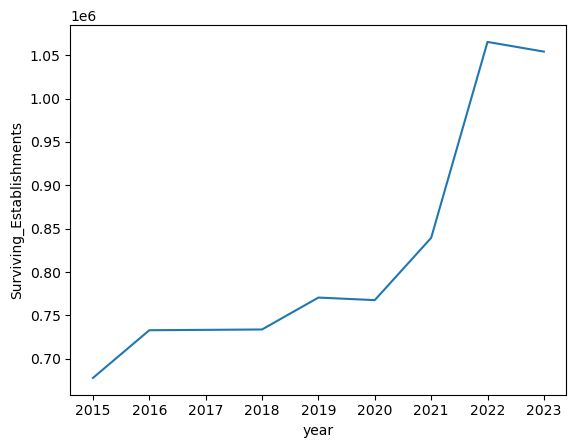

In [18]:
lineplot1 = sns.lineplot(data = wfh_startups,
             x='year',y='Surviving_Establishments') #style='gsector'

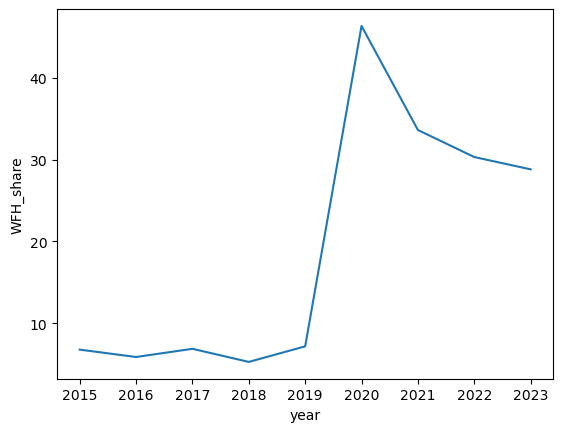

In [19]:
lineplot2 = sns.lineplot(data = wfh_startups,
             x='year',y='WFH_share') #style='gsector'

In [20]:
#lineplot3 = sns.lineplot(data = wfh_startups,
 #            x='log_wfh%',y='startups',hue='high_leverage') #style='gsector'

ValueError: Could not interpret value `log_wfh%` for parameter `x`

In [ ]:
# Now finding Monthly Startup development by industry